# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secret']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secret']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [21]:
client = MongoClient(mongod_connect)
db = client.gp3 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [9]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [10]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [11]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1328081705933148162
1328081706184822785
1328081706532933632
1328081707770073088
1328081708206395393
1328081710421057542
1328081710765002752
1328081711188627456
1328081712077811714
1328081713520537600
1328081714669780992
1328081715483598852
1328081715756208128
1328081715756142593
1328081716716724224
1328081716729294850
1328081717345865734
1328081719191367682
1328081719245774848
1328081719292030978
1328081722903199744
1328081722924122113
1328081724018978822
1328081724555792389
1328081725088526338
1328081725172363269
1328081726699139075
1328081727160508418
1328081727152136192
1328081728678846465


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [12]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [13]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [14]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Sun Nov 15 21:05:49 +0000 2020'
'Sun Nov 15 21:05:49 +0000 2020'
'Sun Nov 15 21:05:49 +0000 2020'
'Sun Nov 15 21:05:49 +0000 2020'
'Sun Nov 15 21:05:49 +0000 2020'
'Sun Nov 15 21:05:48 +0000 2020'
'Sun Nov 15 21:05:47 +0000 2020'
'Sun Nov 15 21:05:47 +0000 2020'
'Sun Nov 15 21:05:47 +0000 2020'
'Sun Nov 15 21:05:47 +0000 2020'
'Sun Nov 15 21:05:46 +0000 2020'
'Sun Nov 15 21:05:46 +0000 2020'
'Sun Nov 15 21:05:46 +0000 2020'
'Sun Nov 15 21:05:46 +0000 2020'
'Sun Nov 15 21:05:46 +0000 2020'
'Sun Nov 15 21:05:46 +0000 2020'
'Sun Nov 15 21:05:45 +0000 2020'
'Sun Nov 15 21:05:45 +0000 2020'
'Sun Nov 15 21:05:45 +0000 2020'
'Sun Nov 15 21:05:45 +0000 2020'
'Sun Nov 15 21:05:45 +0000 2020'
'Sun Nov 15 21:05:45 +0000 2020'
'Sun Nov 15 21:05:45 +0000 2020'
'Sun Nov 15 21:05:44 +0000 2020'
'Sun Nov 15 21:05:44 +0000 2020'
'Sun Nov 15 21:05:44 +0000 2020'
'Sun Nov 15 21:05:44 +0000 2020'
'Sun Nov 15 21:05:43 +0000 2020'
'Sun Nov 15 21:05:43 +0000 2020'
'Sun Nov 15 21:05:43 +0000 2020'
'Sun Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [15]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Sun Nov 15 21:05:26 +0000 2020'
'Sun Nov 15 21:05:25 +0000 2020'
'Sun Nov 15 21:05:25 +0000 2020'
'Sun Nov 15 21:05:25 +0000 2020'
'Sun Nov 15 21:05:25 +0000 2020'
'Sun Nov 15 21:05:25 +0000 2020'
'Sun Nov 15 21:05:25 +0000 2020'
'Sun Nov 15 21:05:24 +0000 2020'
'Sun Nov 15 21:05:24 +0000 2020'
'Sun Nov 15 21:05:24 +0000 2020'
'Sun Nov 15 21:05:24 +0000 2020'
'Sun Nov 15 21:05:23 +0000 2020'
'Sun Nov 15 21:05:23 +0000 2020'
'Sun Nov 15 21:05:22 +0000 2020'
'Sun Nov 15 21:05:22 +0000 2020'
'Sun Nov 15 21:05:22 +0000 2020'
'Sun Nov 15 21:05:22 +0000 2020'
'Sun Nov 15 21:05:21 +0000 2020'
'Sun Nov 15 21:05:21 +0000 2020'
'Sun Nov 15 21:05:21 +0000 2020'
'Sun Nov 15 21:05:21 +0000 2020'
'Sun Nov 15 21:05:21 +0000 2020'
'Sun Nov 15 21:05:21 +0000 2020'
'Sun Nov 15 21:05:20 +0000 2020'
'Sun Nov 15 21:05:20 +0000 2020'
'Sun Nov 15 21:05:20 +0000 2020'
'Sun Nov 15 21:05:20 +0000 2020'
'Sun Nov 15 21:05:20 +0000 2020'
'Sun Nov 15 21:05:19 +0000 2020'
'Sun Nov 15 21:05:19 +0000 2020'
'Sun Nov 1

'Sun Nov 15 21:04:31 +0000 2020'
'Sun Nov 15 21:04:31 +0000 2020'
'Sun Nov 15 21:04:31 +0000 2020'
'Sun Nov 15 21:04:31 +0000 2020'
'Sun Nov 15 21:04:30 +0000 2020'
'Sun Nov 15 21:04:30 +0000 2020'
'Sun Nov 15 21:04:30 +0000 2020'
'Sun Nov 15 21:04:30 +0000 2020'
'Sun Nov 15 21:04:30 +0000 2020'
'Sun Nov 15 21:04:30 +0000 2020'
'Sun Nov 15 21:04:30 +0000 2020'
'Sun Nov 15 21:04:30 +0000 2020'
'Sun Nov 15 21:04:29 +0000 2020'
'Sun Nov 15 21:04:29 +0000 2020'
'Sun Nov 15 21:04:29 +0000 2020'
'Sun Nov 15 21:04:29 +0000 2020'
'Sun Nov 15 21:04:29 +0000 2020'
'Sun Nov 15 21:04:29 +0000 2020'
'Sun Nov 15 21:04:28 +0000 2020'
'Sun Nov 15 21:04:28 +0000 2020'
'Sun Nov 15 21:04:28 +0000 2020'
'Sun Nov 15 21:04:28 +0000 2020'
'Sun Nov 15 21:04:28 +0000 2020'
'Sun Nov 15 21:04:28 +0000 2020'
'Sun Nov 15 21:04:27 +0000 2020'
'Sun Nov 15 21:04:27 +0000 2020'
'Sun Nov 15 21:04:27 +0000 2020'
'Sun Nov 15 21:04:27 +0000 2020'
'Sun Nov 15 21:04:26 +0000 2020'
'Sun Nov 15 21:04:26 +0000 2020'
'Sun Nov 1

TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=100&max_id=1328077920166944768&oauth_consumer_key=R5MkumwEgUVoKBV5kRpTVFO6r&oauth_nonce=10891185869716946488&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1605474390&oauth_token=60388598-IidTtKJpbscMuepdlu3Lk9yaD3ReRNYPRe42Ylr26&oauth_version=1.0&q=covid19&oauth_signature=3GHerH0kT96s7X0k%2F8aT0eHwx8Q%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [16]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

8997
7701


Create a text index and print the Tweets containing specific keywords. 

In [17]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [ ]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [ ]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

In [18]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [19]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
0,5fb1980d363d960d9e86a564,Sun Nov 15 20:35:30 +0000 2020,1328074167850209281,1328074167850209281,RT @DickMorrisTweet: Did Former Biden Staffer ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,False,69,0,False,False,en,NaN,NaN,NaN,NaN
1,5fb197fd363d960d9e869f5b,Sun Nov 15 20:41:10 +0000 2020,1328075593196376070,1328075593196376070,RT @DickMorrisTweet: Did Former Biden Staffer ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,False,69,0,False,False,en,NaN,NaN,NaN,NaN
2,5fb197f5363d960d9e869c5f,Sun Nov 15 20:43:59 +0000 2020,1328076300477722624,1328076300477722624,RT @DickMorrisTweet: Did Former Biden Staffer ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,69,0,False,False,en,NaN,NaN,NaN,NaN
3,5fb19786b4011eb39c374f2e,Sun Nov 15 20:51:09 +0000 2020,1328078107505520642,1328078107505520642,RT @DickMorrisTweet: Did Former Biden Staffer ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,68,0,False,False,en,NaN,NaN,NaN,NaN
4,5fb19778b4011eb39c374a20,Sun Nov 15 20:55:18 +0000 2020,1328079150113021956,1328079150113021956,RT @DickMorrisTweet: Did Former Biden Staffer ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,68,0,False,False,en,NaN,NaN,NaN,NaN
5,5fb19764b4011eb39c3742b0,Sun Nov 15 21:01:25 +0000 2020,1328080690152292352,1328080690152292352,"In the last half hour, 1181 people tweeted abo...",False,"{'hashtags': [{'text': 'Civilwar', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://laramiewatherbot.co"" rel=""nof...",NaN,...,False,0,0,False,False,en,NaN,NaN,NaN,NaN
6,5fb1978db4011eb39c3751a6,Sun Nov 15 20:49:13 +0000 2020,1328077618223124489,1328077618223124489,RT @Lezlyee2: @AliVelshi @ThatEvanFowler It's ...,False,"{'hashtags': [{'text': 'Covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,False,2,0,False,False,en,NaN,NaN,NaN,NaN
7,5fb1978db4011eb39c3751a0,Sun Nov 15 20:49:14 +0000 2020,1328077621482168320,1328077621482168320,RT @Lezlyee2: @AliVelshi @ThatEvanFowler It's ...,False,"{'hashtags': [{'text': 'Covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://naattuvartha.byethost33.com"" r...",NaN,...,False,2,0,False,False,en,NaN,NaN,NaN,NaN
8,5fb19774b4011eb39c3748b0,Sun Nov 15 20:56:36 +0000 2020,1328079476010389505,1328079476010389505,@brandondarby #COVID19 IS a huge deal and Trum...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.328078e+18,...,False,0,0,False,False,en,NaN,NaN,NaN,NaN
9,5fb19800363d960d9e86a083,Sun Nov 15 20:40:06 +0000 2020,1328075324047974400,1328075324047974400,"Video ""The Unity That's Unbreakable - Overcomi...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,False,0,0,False,False,en,False,NaN,NaN,NaN


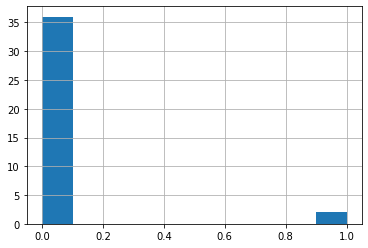

In [20]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count